In [1]:
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from VirtualRatModel import VirtualRatModel
from VirtualRatSolver import VirtualRatSolver
from VirtualRatBox import VirtualRatBox
from VirtualRat import VirtualRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

W1107 02:04:26 14431 minpy.dispatch.registry:register:47] Type MXNet for name reshape has already existed
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:98: DeprecationWarning: DisplayFormatter._formatters_default is deprecated: use @default decorator instead.
  def _formatters_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:677: DeprecationWarning: PlainTextFormatter._deferred_printers_default is deprecated: use @default decorator instead.
  def _deferred_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):
/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/IPython/core/formatters.py:672: DeprecationWarning: PlainTextFormatter

In [2]:
epoch_per_loop = 100
num_loop = 101

In [3]:
all_switch_ratio_pro = []
all_switch_ratio_anti = []

for j in range(11):
    pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
        = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
    for i in range(0,110,10):
        try:
            matrices = load_weights("RatioTime/RatioTime-"+str(j/10.0)+"-"+str(i)+".pkl")
        except IOError:
            continue
        pro_block, pro_switch, anti_block, anti_switch = matrices
        pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
        anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
        pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
        anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
    matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]
    pro_switch_time = pro_switch_matrix - pro_block_matrix
    anti_switch_time = anti_switch_matrix - anti_block_matrix
    
    all_switch_ratio_pro.append(pro_switch_time)
    all_switch_ratio_anti.append(anti_switch_time)

3500


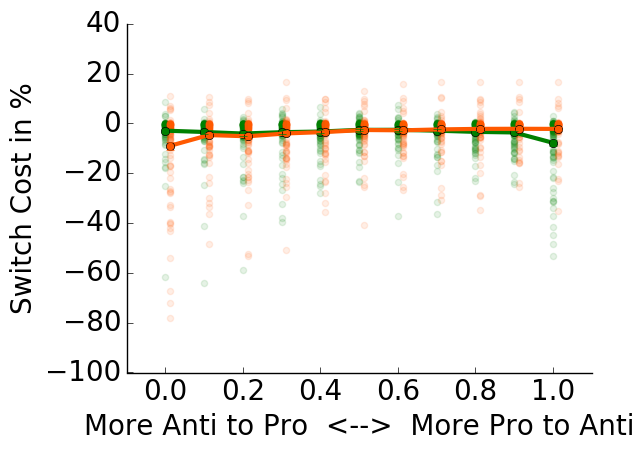

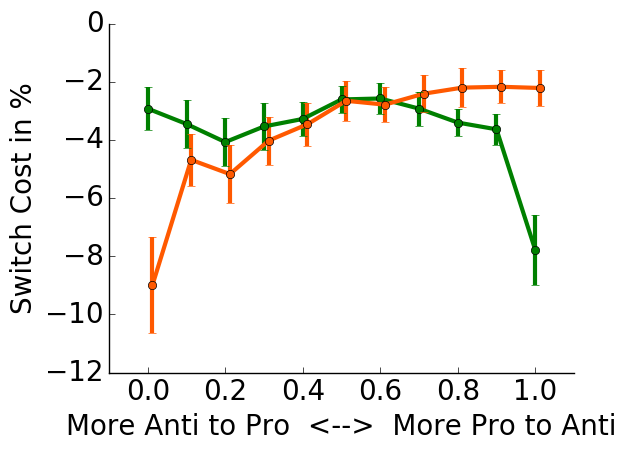

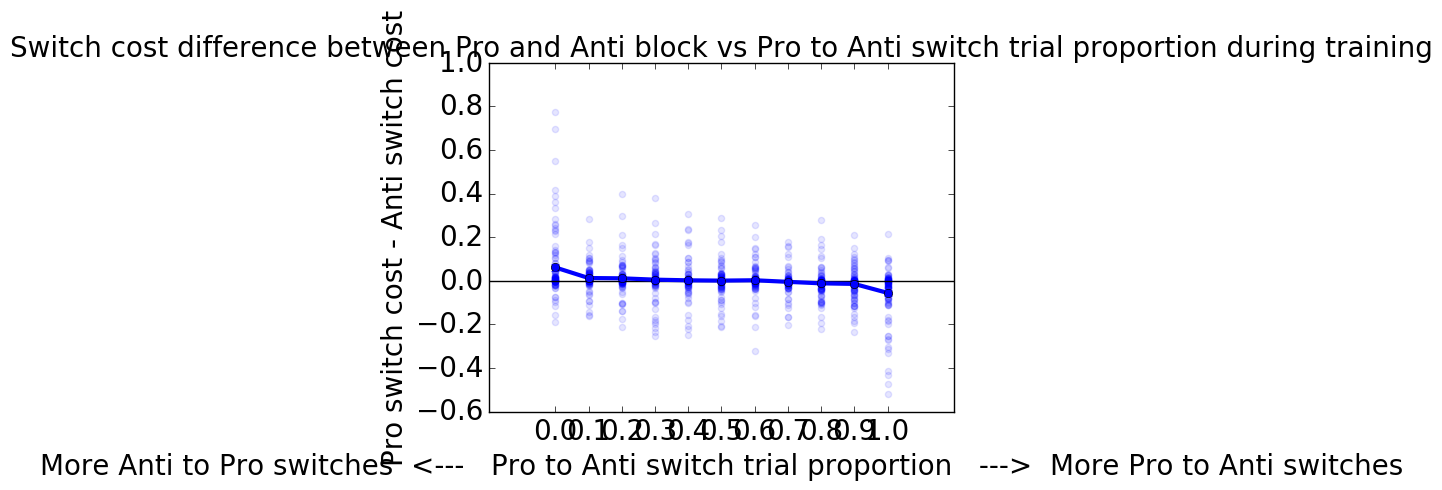

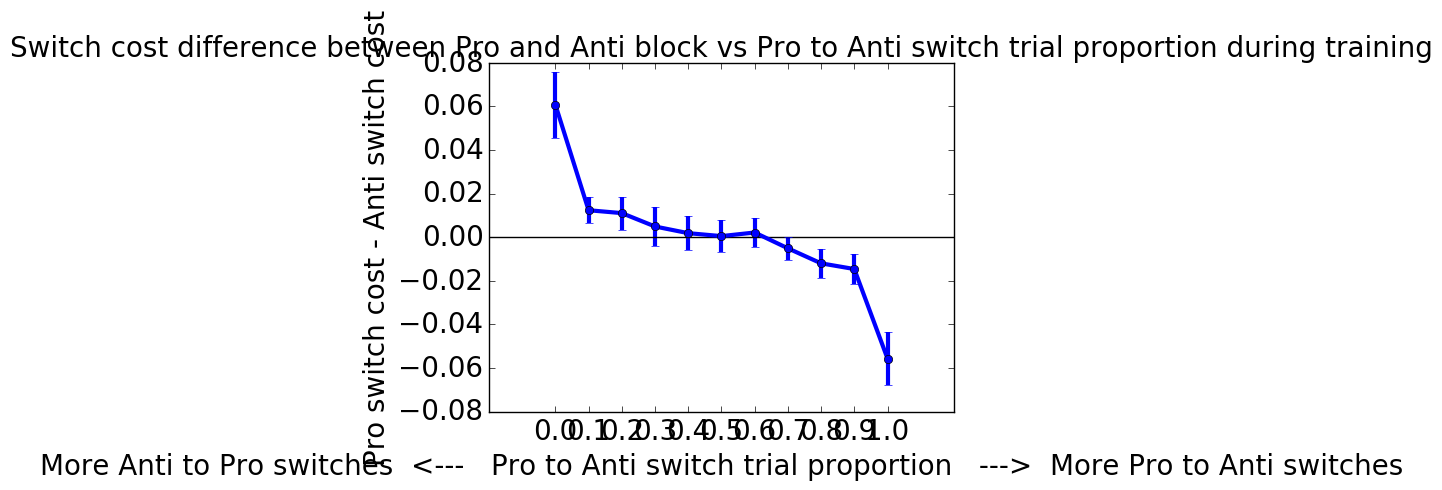

In [19]:
t=35
print t*100
switch_ratio_pro_list = []
switch_ratio_anti_list = []
for j in range(11):
    switch_ratio_pro_list.append(all_switch_ratio_pro[j][:,t])
    switch_ratio_anti_list.append(all_switch_ratio_anti[j][:,t])
pro = list2np(switch_ratio_pro_list)
anti = list2np(switch_ratio_anti_list)

asymmetry_vs_ratio(pro_switch_costs = pro, anti_switch_costs = anti, exclude = True)
asymmetry_vs_ratio(pro_switch_costs = pro, anti_switch_costs = anti, exclude = True, individual = False, filename="Ratio.pdf")
asymmetry_difference_vs_ratio(pro_switch_costs = pro, anti_switch_costs = anti, exclude = True)
asymmetry_difference_vs_ratio(pro_switch_costs = pro, anti_switch_costs = anti, exclude = True, individual = False)